<a href="https://colab.research.google.com/github/lucabrombin/Unsupervised-anomaly-detection-in-Images-/blob/master/BiGAN_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First of all

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from PIL import Image
from math import floor
import numpy as np
import time
from functools import partial
from random import random
import os
from keras.layers import Conv2D, Dense, AveragePooling2D, Activation, Cropping2D, Dropout, BatchNormalization
from keras.layers import Reshape, UpSampling2D, Flatten, Input, add, Lambda, concatenate, LeakyReLU, multiply
from keras.layers import GlobalAveragePooling2D, average
from keras.models import model_from_json, Model
from keras.initializers import VarianceScaling
from keras.optimizers import Adam
import keras.backend as K
from typing import Tuple
from enum import Enum
import matplotlib.pyplot as plt
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import copy

# Bidirectional GAN

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 128, 128, 16) 448         input_13[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_63 (LeakyReLU)      (None, 128, 128, 16) 0           conv2d_75[0][0]                  
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 128, 128, 16) 2320        leaky_re_lu_63[0][0]             
____________________________________________________________________________________________

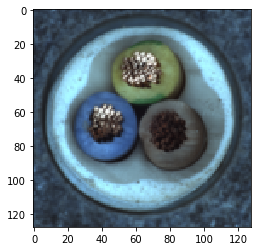

Found 10000 images in Object.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


  |██████████████████████████████████████████████████| 100% 



Round 100:
D: [1.7828937, 1.2445593, 0.39493358, 0.14340079]
G: [0.4725128, 0.02969468, 0.44281814]
Steps/Second: 0.45
Steps/Hour: 1632
1k Steps: 36:46
Til Completion: 122h30m

E Mean: -0.08335906
E Std: 0.99042284
E Std Featurewise: 0.432794

  |██████████████████████████████████████████████████| 100% 



Round 200:
D: [1.8579518, 1.1416624, 0.5687211, 0.14756837]
G: [0.55168796, -0.20313175, 0.7548197]
Steps/Second: 2.95
Steps/Hour: 10606
1k Steps: 5:39
Til Completion: 18h50m

E Mean: 0.025026737
E Std: 1.1824555
E Std Featurewise: 0.43862462

  |██████████████████████████████████████████████████| 100% 



Round 300:
D: [2.4936836, 2.367593, 0.0, 0.12609056]
G: [0.51627105, 1.1368679, -0.6205968]
Steps/Second: 3.71
Steps/Hour: 13348
1k Steps: 4:29
Til Completion: 14h57m

E Mean: -0.019212462
E Std: 0.9636858
E Std Featurewise: 0.6160768

  |██████████████████████████████████████████████████| 100% 



Round 400:
D: [2.094

In [0]:
from PIL import Image
from math import floor
import numpy as np
import time
from functools import partial
from random import random
import os
import matplotlib.pyplot as plt

#from keras.models import Sequential, Model

#from keras.layers import Input, Reshape, Dense, Dropout, MaxPooling2D, Conv2D, Flatten
#from keras.layers import Conv2DTranspose, LeakyReLU

#from keras.layers.core import Activation

from keras.layers import Conv2D, Dense, AveragePooling2D, Activation, Cropping2D, Dropout, BatchNormalization
from keras.layers import Reshape, UpSampling2D, Flatten, Input, add, Lambda, concatenate, LeakyReLU, multiply
from keras.layers import GlobalAveragePooling2D, average
from keras.models import model_from_json, Model
from keras.initializers import VarianceScaling
from keras.optimizers import Adam
import keras.backend as K

from os import listdir
from os.path import isfile, join, isdir
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator

from sklearn.feature_extraction import image
from sklearn.datasets import load_sample_image
import cv2


###GLOBAL VARIABLE###
im_size = 128
latent_size = 64
BATCH_SIZE = 32
directory = "Object"
suff = 'png'
cmode = 'RGB'
channels = 3
size_adjusted = False

k_images = 3

cha = 16
object_name = "Cable"
#####################

def noise(n):
    return np.random.normal(0.0, 1.0, size = [n, latent_size])


class dataGenerator(object):

    def __init__(self, loc, flip = False, suffix = 'png'):
        self.flip = False
        self.suffix = suffix
        self.files = []
        self.n = 1e10

        print("Importing Images...")
        try:
          os.mkdir("Results")
          os.mkdir("Models")
          os.mkdir("data")
        except:
          pass

        try:
            os.mkdir("/content/drive/My Drive/Colab Notebooks/BiGAN/Images/"+str(object_name))
            os.mkdir("/content/drive/My Drive/Colab Notebooks/BiGAN/"+str(object_name))
        except:
            pass
            #self.load_from_npy(loc)
            #return
        DATASET_TRAIN_PATH = "/content/drive/My Drive/Colab Notebooks/test_AD_1/cable/train/good"
        for dirpath, dirnames, filenames in os.walk(DATASET_TRAIN_PATH):
            for filename in [f for f in filenames if f.endswith("."+str('png'))]:
                print('\r' + str(len(self.files)), end = '\r')
                
                fname = os.path.join(dirpath, filename)
                print(fname)

                temp = Image.open(fname).convert(cmode)
                #im_size = 512
                temp = temp.resize((im_size, im_size), Image.BILINEAR)
                temp = np.array(temp, dtype='uint8')
                #img = load_img(fname, target_size=(1024, 1024))
                #img = np.array(img)

                #print(img.shape)

                #patches = image.extract_patches_2d(img, (256, 256), max_patches=4)
                #print(patches.shape)

                #blocks = np.array([img[i:i+256, j:j+256] for j in range(0,1024,256) for i in range(0,1024,256)])
                
                #for elem in blocks:
                  #self.files.append(elem)
                  #print(elem.shape)

                self.files.append(temp)

                #if self.flip:
                #    self.files.append(np.flip(temp, 1))

        self.files = np.array(self.files)

        plt.imshow(self.files[0])
        plt.show()

        # define data preparation
        #datagen = ImageDataGenerator(
        #  rotation_range=20,
        #  zoom_range=0.15,
        #  width_shift_range=0.2,
        #  height_shift_range=0.2,
        #  shear_range=0.15,
        #  horizontal_flip=True,
        #  fill_mode="nearest")

        datagen = ImageDataGenerator(
          rotation_range=0,
          zoom_range=0,
          width_shift_range=0,
          height_shift_range=0,
          #shear_range=0.15,
          horizontal_flip=False,
          fill_mode="nearest")
        
        imageGen = datagen.flow(self.files, batch_size=1, save_to_dir="./temp", save_prefix="image", save_format="png")

        img = imageGen.next()
        new_dataset = []
        for i in range(0,10000):
          
          image = np.squeeze(img, axis = 0)
          #plt.imshow(image.astype('uint8'))
          #plt.show()

          new_dataset.append(image)

          img = imageGen.next()

        self.files = np.array(new_dataset)
          

        #np.save("data/" + loc + "-npy-" + str(im_size) + "/data.npy", self.files)

        self.n = self.files.shape[0]

        print("Found " + str(self.n) + " images in " + loc + ".")

    def load_from_npy(self, loc):

        print("Loading from .npy files.")

        self.files = np.load("data/" + str(loc) + "-npy-" + str(im_size) + "/data.npy")

        self.n = self.files.shape[0]


    def get_batch(self, num):

        idx = np.random.randint(0, self.n - 200, num)
        out = []

        for i in range(num):
            out.append(self.files[idx[i]])

        return np.array(out).astype('float32') / 255.0

    def get_test_batch(self, num):

        idx = np.random.randint(self.n - 200, self.n, num)
        out = []

        for i in range(num):
            out.append(self.files[idx[i]])

        return np.array(out).astype('float32') / 255.0


# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 50, fill = '█'):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r %s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = '\r')
    # Print New Line on Complete
    if iteration == total:
        print()
        print()

def gradient_penalty_loss(y_true, y_pred, averaged_samples, weight):
    gradients = K.gradients(y_pred, averaged_samples)[0]
    gradients_sqr = K.square(gradients)
    gradient_penalty = K.sum(gradients_sqr,
                              axis=np.arange(1, len(gradients_sqr.shape)))

    # (weight / 2) * ||grad||^2
    # Penalize the gradient norm
    return K.mean(gradient_penalty) * (weight / 2)

def hinge_d(y_true, y_pred):
    return K.mean(K.relu(1.0 - (y_true * y_pred)))

def w_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)

def g_block(inp, fil, u = True):

    if u:
        out = UpSampling2D(interpolation = 'bilinear')(inp)
    else:
        out = Activation('linear')(inp)

    skip = Conv2D(fil, 1, padding = 'same', kernel_initializer = 'he_normal')(out)

    out = Conv2D(filters = fil, kernel_size = 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = LeakyReLU(0.2)(out)

    out = Conv2D(filters = fil, kernel_size = 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = LeakyReLU(0.2)(out)

    out = Conv2D(fil, 1, padding = 'same', kernel_initializer = 'he_normal')(out)

    out = add([out, skip])
    out = LeakyReLU(0.2)(out)

    return out

def d_block(inp, fil, p = True):

    skip = Conv2D(fil, 1, padding = 'same', kernel_initializer = 'he_normal')(inp)

    out = Conv2D(filters = fil, kernel_size = 3, padding = 'same', kernel_initializer = 'he_normal')(inp)
    out = LeakyReLU(0.2)(out)

    out = Conv2D(filters = fil, kernel_size = 3, padding = 'same', kernel_initializer = 'he_normal')(out)
    out = LeakyReLU(0.2)(out)

    out = Conv2D(fil, 1, padding = 'same', kernel_initializer = 'he_normal')(out)

    out = add([out, skip])
    out = LeakyReLU(0.2)(out)

    if p:
        out = AveragePooling2D()(out)

    return out

class GAN(object):

    def __init__(self, steps = 1, lr = 0.0001, decay = 0.00001):

        #Models
        self.D = None
        self.E = None
        self.G = None

        self.GE = None
        self.EE = None

        self.DM = None
        self.AM = None

        #Config
        self.LR = lr
        self.steps = steps
        self.beta = 0.999

        #Init Models
        self.discriminator()
        self.generator()
        self.encoder()

        self.EE = model_from_json(self.E.to_json())
        self.EE.set_weights(self.E.get_weights())

        self.GE = model_from_json(self.G.to_json())
        self.GE.set_weights(self.G.get_weights())

    def discriminator(self):

        if self.D:
            return self.D

        inp = Input(shape = [im_size, im_size, 3])
        inpl = Input(shape = [latent_size])

        #Latent input
        l = Dense(512, kernel_initializer = 'he_normal')(inpl)
        l = LeakyReLU(0.2)(l)
        l = Dense(512, kernel_initializer = 'he_normal')(l)
        l = LeakyReLU(0.2)(l)
        l = Dense(512, kernel_initializer = 'he_normal')(l)
        l = LeakyReLU(0.2)(l)

        x = d_block(inp, 1 * cha)   #64
        x = d_block(x, 2 * cha)   #32
        x = d_block(x, 3 * cha)   #16
        x = d_block(x, 4 * cha)  #8
        x = d_block(x, 8 * cha)  #4
        x = d_block(x, 16 * cha, p = False)  #4

        x = Flatten()(x)

        x = concatenate([x, l])

        x = Dense(16 * cha, kernel_initializer = 'he_normal')(x)
        x = LeakyReLU(0.2)(x)

        x = Dense(1, kernel_initializer = 'he_normal')(x)

        self.D = Model(inputs = [inp, inpl], outputs = x)
        self.D.summary()

        return self.D

    def generator(self):

        if self.G:
            return self.G

        #Inputs
        inp = Input(shape = [latent_size])

        #Latent

        #Actual Model
        x = Dense(4*4*16*cha, kernel_initializer = 'he_normal')(inp)
        x = Reshape([4, 4, 16*cha])(x)

        x = g_block(x, 16 * cha, u = False)  #4
        x = g_block(x, 8 * cha)  #8
        x = g_block(x, 4 * cha)  #16
        x = g_block(x, 3 * cha)   #32
        x = g_block(x, 2 * cha)   #64
        x = g_block(x, 1 * cha)   #128

        x = Conv2D(filters = 3, kernel_size = 1, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal')(x)

        self.G = Model(inputs = inp, outputs = x)

        return self.G

    def encoder(self):

        if self.E:
            return self.E

        inp = Input(shape = [im_size, im_size, 3])

        x = d_block(inp, 1 * cha)   #64
        x = d_block(x, 2 * cha)   #32
        x = d_block(x, 3 * cha)   #16
        x = d_block(x, 4 * cha)  #8
        x = d_block(x, 8 * cha)  #4
        x = d_block(x, 16 * cha, p = False)  #4

        x = Flatten()(x)

        x = Dense(16 * cha, kernel_initializer = 'he_normal')(x)
        x = LeakyReLU(0.2)(x)

        x = Dense(latent_size, kernel_initializer = 'he_normal', bias_initializer = 'zeros')(x)

        self.E = Model(inputs = inp, outputs = x)
        self.E.summary()

        return self.E

    def AdModel(self):

        #D does not update
        self.D.trainable = False
        for layer in self.D.layers:
            layer.trainable = False

        #G does update
        self.G.trainable = True
        for layer in self.G.layers:
            layer.trainable = True

        #E does update
        self.E.trainable = True
        for layer in self.E.layers:
            layer.trainable = True

        # Fake Latent / Real Image
        ri = Input(shape = [im_size, im_size, 3])

        er = self.E(ri)
        dr = self.D([ri, er])

        # Real Latent / Fake Image
        gi = Input(shape = [latent_size])

        gf = self.G(gi)
        df = self.D([gf, gi])

        self.AM = Model(inputs = [ri, gi], outputs = [dr, df])

        self.AM.compile(optimizer = Adam(self.LR, beta_1 = 0, beta_2 = 0.099), loss = [w_loss, w_loss])

        return self.AM

    def DisModel(self):

        #D does update
        self.D.trainable = True
        for layer in self.D.layers:
            layer.trainable = True

        #G does not update
        self.G.trainable = False
        for layer in self.G.layers:
            layer.trainable = False

        #E does update
        self.E.trainable = False
        for layer in self.E.layers:
            layer.trainable = False

        # Fake Latent / Real Image
        ri = Input(shape = [im_size, im_size, 3])

        er = self.E(ri)
        dr = self.D([ri, er])

        # Real Latent / Fake Image
        gi = Input(shape = [latent_size])

        gf = self.G(gi)
        df = self.D([gf, gi])

        self.DM = Model(inputs = [ri, gi], outputs = [dr, df, df])

        # Create partial of gradient penalty loss
        # For r1, averaged_samples = ri
        # For r2, averaged_samples = gf
        # Weight of 10 typically works
        partial_gp_loss = partial(gradient_penalty_loss, averaged_samples = [gf, gi], weight = 5)

        #Compile With Corresponding Loss Functions
        self.DM.compile(optimizer = Adam(self.LR, beta_1 = 0, beta_2 = 0.909), loss=[hinge_d, hinge_d, partial_gp_loss])

        return self.DM

    def EMA(self):

        start = time.clock()

        for i in range(len(self.G.layers)):
            up_weight = self.G.layers[i].get_weights()
            old_weight = self.GE.layers[i].get_weights()
            new_weight = []
            for j in range(len(up_weight)):
                new_weight.append(old_weight[j] * self.beta + (1-self.beta) * up_weight[j])
            self.GE.layers[i].set_weights(new_weight)

        for i in range(len(self.E.layers)):
            up_weight = self.E.layers[i].get_weights()
            old_weight = self.EE.layers[i].get_weights()
            new_weight = []
            for j in range(len(up_weight)):
                new_weight.append(old_weight[j] * self.beta + (1-self.beta) * up_weight[j])
            self.EE.layers[i].set_weights(new_weight)

        #print("Moved Average. " + str(time.clock() - start) + "s")

    def MAinit(self):
        self.EE.set_weights(self.E.get_weights())
        self.GE.set_weights(self.G.get_weights())

class BiGAN(object):

    def __init__(self, steps = 1, lr = 0.0001, decay = 0.00001, silent = True):

        self.GAN = GAN(steps = steps, lr = lr, decay = decay)
        self.DisModel = self.GAN.DisModel()
        self.AdModel = self.GAN.AdModel()

        # LOAD THE LAST MODEL SAVED TO CONTINUE THE TRAINING FROM "step" ITERATION 
        self.load(1)

        self.lastblip = time.clock()

        self.noise_level = 0

        self.im = dataGenerator(directory, suffix = suff, flip = True)

        self.silent = silent

        #Train Generator to be in the middle, not all the way at real. Apparently works better??
        self.ones = np.ones((BATCH_SIZE, 1), dtype=np.float32)
        self.zeros = np.zeros((BATCH_SIZE, 1), dtype=np.float32)
        self.nones = -self.ones

    def train(self):

        #Train Alternating
        a = self.train_dis()
        b = self.train_gen()

        if self.GAN.steps % 10 == 0:
            self.GAN.EMA()

        if self.GAN.steps == 20000:
            self.GAN.MAinit()


        #Print info
        if self.GAN.steps % 100 == 0 and not self.silent:
            print("\n\nRound " + str(self.GAN.steps) + ":")
            print("D: " + str(a))
            print("G: " + str(b))
            s = round((time.clock() - self.lastblip), 4)
            steps_per_second = 100 / s
            steps_per_minute = steps_per_second * 60
            steps_per_hour = steps_per_minute * 60
            print("Steps/Second: " + str(round(steps_per_second, 2)))
            print("Steps/Hour: " + str(round(steps_per_hour)))
            min1k = floor(1000/steps_per_minute)
            sec1k = floor(1000/steps_per_second) % 60
            print("1k Steps: " + str(min1k) + ":" + str(sec1k))
            self.lastblip = time.clock()
            steps_left = 200000 - self.GAN.steps + 1e-7
            hours_left = steps_left // steps_per_hour
            minutes_left = (steps_left // steps_per_minute) % 60

            print("Til Completion: " + str(int(hours_left)) + "h" + str(int(minutes_left)) + "m")
            print()

            #Save Model
            if self.GAN.steps % 1000 == 0:
                self.save(floor(self.GAN.steps / 1000))

            if self.GAN.steps % 1000 == 0 or (self.GAN.steps % 100 == 0 and self.GAN.steps < 1000):
                self.evaluate(floor(self.GAN.steps / 1000))


        printProgressBar(self.GAN.steps % 100, 99, decimals = 0)

        self.GAN.steps = self.GAN.steps + 1

    def train_dis(self):

        #Get Data
        train_data = [self.im.get_batch(BATCH_SIZE), noise(BATCH_SIZE)]

        #Train
        d_loss = self.DisModel.train_on_batch(train_data, [self.ones, self.nones, self.ones])

        return d_loss

    def train_gen(self):

        #Train
        train_data = [self.im.get_batch(BATCH_SIZE), noise(BATCH_SIZE)]

        g_loss = self.AdModel.train_on_batch(train_data, [self.ones, self.nones])

        return g_loss

    def evaluate(self, num = 0):

        n1 = noise(32)

        generated_images = self.GAN.G.predict(n1, batch_size = BATCH_SIZE)

        real_images = self.im.get_test_batch(16)
        latent_codes = self.GAN.E.predict(real_images, batch_size = BATCH_SIZE)
        reconstructed_images = self.GAN.G.predict(latent_codes, batch_size = BATCH_SIZE)

        print("E Mean: " + str(np.mean(latent_codes)))
        print("E Std: " + str(np.std(latent_codes)))
        print("E Std Featurewise: " + str(np.mean(np.std(latent_codes, axis = 0))))
        print()

        r = []

        for i in range(0, 32, 8):
            r.append(np.concatenate(generated_images[i:i+8], axis = 1))

        hline = np.zeros([16, 8 * im_size, 3])
        r.append(hline)

        for i in range(0, 16, 8):
            r.append(np.concatenate(real_images[i:i+8], axis = 1))
            r.append(np.concatenate(reconstructed_images[i:i+8], axis = 1))

        c1 = np.concatenate(r, axis = 0)

        x = Image.fromarray(np.uint8(c1*255))

        x.save("/content/drive/My Drive/Colab Notebooks/BiGAN/Images/"+object_name+"/i"+str(num)+".png")

        # Moving Average

        n1 = noise(32)

        generated_images = self.GAN.GE.predict(n1, batch_size = BATCH_SIZE)

        latent_codes = self.GAN.EE.predict(real_images, batch_size = BATCH_SIZE)
        reconstructed_images = self.GAN.GE.predict(latent_codes, batch_size = BATCH_SIZE)

        r = []

        for i in range(0, 32, 8):
            r.append(np.concatenate(generated_images[i:i+8], axis = 1))

        hline = np.zeros([16, 8 * im_size, 3])
        r.append(hline)

        for i in range(0, 16, 8):
            r.append(np.concatenate(real_images[i:i+8], axis = 1))
            r.append(np.concatenate(reconstructed_images[i:i+8], axis = 1))

        c1 = np.concatenate(r, axis = 0)

        x = Image.fromarray(np.uint8(c1*255))

        x.save("/content/drive/My Drive/Colab Notebooks/BiGAN/Images/"+object_name+"/i"+str(num)+"-ema.png")


    def prepareSamples(self, cnum = 0, num = 1000): #8x8 images, bottom row is constant

        try:
            os.mkdir("Results/Samples-c" + str(cnum))
        except:
            x = 0

        im = self.im.get_class(cnum)
        e = self.GAN.E.predict(im, batch_size = BATCH_SIZE * k_images)

        mean = np.mean(e, axis = 0)
        std = np.std(e, axis = 0)

        n = noise(num)
        nc = nClass(num, mean, std)

        im = self.GAN.G.predict([n, nc], batch_size = BATCH_SIZE)

        for i in range(im.shape[0]):

            x = Image.fromarray(np.uint8(im[i]*255), mode = 'RGB')

            x.save("Results/Samples-c" + str(cnum) + "/im ("+str(i+1)+").png")

    def saveModel(self, model, name, num):
        json = model.to_json()
        with open("/content/drive/My Drive/Colab Notebooks/BiGAN/"+object_name+"/"+name+".json", "w") as json_file:
            json_file.write(json)

        model.save_weights("/content/drive/My Drive/Colab Notebooks/BiGAN/"+object_name+"/"+name+"_"+str(num)+".h5")
        #model.save("Models/"+name+"_"+str(num)+".h5")

    def loadModel(self, name, num):

        file = open("/content/drive/My Drive/Colab Notebooks/BiGAN/"+object_name+"/"+name+".json", 'r')
        json = file.read()
        file.close()

        mod = model_from_json(json)
        mod.load_weights("/content/drive/My Drive/Colab Notebooks/BiGAN/"+object_name+"/"+name+"_"+str(num)+".h5")

        return mod

    def save(self, num): #Save JSON and Weights into /Models/
        self.saveModel(self.GAN.G, "gen", num)
        self.saveModel(self.GAN.D, "dis", num)
        self.saveModel(self.GAN.E, "enc", num)

        self.saveModel(self.GAN.GE, "genMA", num)
        self.saveModel(self.GAN.EE, "encMA", num)


    def load(self, num): #Load JSON and Weights from /Models/
        steps1 = self.GAN.steps

        #Load Models
        self.GAN.G = self.loadModel("gen", num)
        self.GAN.D = self.loadModel("dis", num)
        self.GAN.E = self.loadModel("enc", num)

        self.GAN.GE = self.loadModel("genMA", num)
        self.GAN.EE = self.loadModel("encMA", num)

        self.GAN.steps = steps1

        self.DisModel = self.GAN.DisModel()
        self.AdModel = self.GAN.AdModel()

if __name__ == "__main__":
    #np.random.seed(1)
    model = BiGAN(lr = 0.0001, silent = False)
    #model.evaluate(0)

    while model.GAN.steps <= 600000:
      model.train()
        

# Anomaly detector

In [0]:
# CREATE A RANDOM NORMAL NOISE THAT IS THE INPUT OF THE GENERATOR
def mynoise(n):
    return np.random.normal(0.0, 1.0, size = [n, 64])

# CLASS TO DEFINE SOME PARAMETERS 
class DataParm(Enum):
    common_path = './model'
    common_path_efficient = './model2'
    image_size_127_5 = 127.5
    batch_size_64 = 64

# LOSS FUNCTION OF THE ANOMALY DETECTOR, THIS IS USED TO FIND THE 
# POINT z' IN THE LATENT SPACE Z THAT GENERATE THE MOST SIMILAR 
# IMAGE TO THE QUERY 
def sum_of_residual(y_true: np.array, y_pred: np.array):
    return K.sum(K.abs(y_true - y_pred))

class FeatureExtractorParam(Enum):
    loss_binary_crossentropy = "binary_crossentropy"
    optimizer_rmsprop = "rmsprop"
    feature_extract_layer_first_conv = -65

# FEATURE EXTRACTOR, THIS IS USED TO CREATE THE FEATURE 
# REPRESENTATION OF THE QUERY AND FOR THE GENERATED IMAGE
def feature_extractor(d: Model=None, common_path: str=DataParm.common_path.value) -> Model:
    intermidiate_model = Model(inputs=d.layers[0].input, outputs=d.layers[FeatureExtractorParam.feature_extract_layer_first_conv.value].output)
    intermidiate_model.compile(loss=FeatureExtractorParam.loss_binary_crossentropy.value, optimizer=FeatureExtractorParam.optimizer_rmsprop.value)

    return intermidiate_model

class AnomalyDetectorParam(Enum):
    activation_sigmoid = "sigmoid"
    optimizer_rmsprop = 'rmsprop'

# ANOMALY DETECTOR
def anomaly_detector(g: Model, d: Model, e: Model, in_shape: tuple=(64,), loss_weights: list=[0.9, 0.1]) -> Model:
    intermidiate_model = feature_extractor(d)
    feature_extractor.trainable = False

    g = Model(inputs=g.layers[1].input, outputs=g.layers[-1].output)
    g.trainable = False
    
    a2Input = Input(shape=in_shape)

    gInput = Dense(in_shape[0], trainable=True)(a2Input)
    gInput = Activation(AnomalyDetectorParam.activation_sigmoid.value)(gInput)
    
    G_out = g(gInput)
    D_out = intermidiate_model(G_out)
    
    model = Model(inputs=a2Input, outputs=[G_out, D_out])
    model.compile(loss=sum_of_residual, loss_weights=loss_weights, optimizer=AnomalyDetectorParam.optimizer_rmsprop.value)
    
    K.set_learning_phase(0)
    
    return model

# COMPUTE THE ANOMALY SCORE OF THE QUERY USING THE ANOMALY DETECTOR,
# WE ITERARE OVER Z IN ORDER TO FIND THE MOST SIMILAR IMAGE TO THE QUERY,
# IN THE LAST ITERATION WE CAN COMPUTE THE LOSS 
def compute_anomaly_score(model: Model, x: np.array, iterations: int=500, d: Model=None, e: Model=None, noize_shape: tuple=(1, 64)) -> Tuple[np.asarray, np.asarray,]:
    z = np.random.uniform(0, 1, size=noize_shape)
    intermidiate_model = feature_extractor(d)
    d_x = intermidiate_model.predict(x)
    loss = model.fit(z, [x, d_x], batch_size=1, epochs=iterations, verbose=0)
    similar_data, _ = model.predict(z)
    loss = loss.history['loss'][-1]
    
    return loss, similar_data

# GIVEN THE QUERY WE COMPUTE THE ANOMALY SCORE, WE FIND THE MOST SIMILAR IMAGE
# AND WE PERFORM THE DIFFERENCE BETWEEN THE QUERY AND THE SIMILAR IMAGE 
def anomaly_detection(test_img: np.asarray, g: Model, d: Model, e: Model, iteration: int=200) -> Tuple[np.asarray, np.asarray, np.asarray, np.asarray,]:
    model = anomaly_detector(g=g, d=d, e=e)
    test_img_shape = test_img.shape
    
    ano_score, similar_img = compute_anomaly_score(model, test_img.reshape(1, test_img_shape[0], test_img_shape[1], test_img_shape[2]), iterations=iteration, d=d, e=e)
    
    np_residual = test_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2]) - similar_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2])
    np_residual = (np_residual + 2) / 4
    
    np_residual = (255 * np_residual).astype(np.uint8)
    #original_x = (test_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2]) * DataParm.image_size_127_5.value + DataParm.image_size_127_5.value).astype(np.uint8)
    #similiar_x = (similar_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2]) * DataParm.image_size_127_5.value + DataParm.image_size_127_5.value).astype(np.uint8)
    
    #original_x_color = cv2.cvtColor(original_x, cv2.COLOR_GRAY2BGR)
    #residual_color = cv2.applyColorMap(np_residual, cv2.COLORMAP_JET)
    #show = cv2.addWeighted(original_x_color, 0.3, residual_color, 0.7, 0.)

    sim = cv2.cvtColor(similar_img[0],cv2.COLOR_BGR2GRAY)
    test = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
    errors = np.abs(sim-test)
    #errors = sim-test
    #diff = np.mean(np.squeeze(errors),axis=2)
    
    return ano_score, test_img, similar_img[0], errors

# BELOW WE HAVE A VARIATION OF THE CALCULATION OF THE ANOMALY SCORE,
# NOW IS COMPUTED AS A MEAN OF MORE ANOMALY SCORE 
def anomaly_detector_second(g: Model, d: Model, in_shape: tuple=(64,), loss_weights: list=[0.9, 0.1]) -> Model:

    intermidiate_model = feature_extractor(d)
    feature_extractor.trainable = False

    g = Model(inputs=g.layers[1].input, outputs=g.layers[-1].output)
    g.trainable = False

    aInput = Input(shape=in_shape)

    gInput = Dense(in_shape[0], trainable=True)(aInput)
    gInput = Activation(AnomalyDetectorParam.activation_sigmoid.value)(gInput)
    
    G_out = g(gInput)
    D_out = intermidiate_model(G_out)

    model = Model(inputs=aInput, outputs=[G_out, D_out])
    model.compile(loss=sum_of_residual, loss_weights=loss_weights, optimizer=AnomalyDetectorParam.optimizer_rmsprop.value)
    
    K.set_learning_phase(0)
    
    return model

def compute_anomaly_score_second(model: Model, x: np.array, iterations: int=5, z_num: int=5, d: Model=None, g: Model=None, noize_shape: tuple=(1, 64)) -> Tuple[np.asarray, np.asarray,]:
    loss_list = []
    similar_data_list = []
    initial_g = copy.deepcopy(g)
    
    for i in range(z_num):
        z = np.random.uniform(0, 1, size=noize_shape)
        intermidiate_model = feature_extractor(d)
        d_x = intermidiate_model.predict(x)
        loss = model.fit(z, [x, d_x], batch_size=1, epochs=iterations, verbose=0)
        similar_data, _ = model.predict(z)
        loss = loss.history['loss'][-1]
        loss_list.append(loss)
        similar_data_list.append(similar_data)
        model = anomaly_detector_second(g=initial_g, d=d)
      
    average_loss = np.average(loss_list)
    average_similar_data = np.average(similar_data_list, axis=0)
    
    return average_loss, average_similar_data

def anomaly_detection_second(test_img, g=None, d=None, iterations: int=5) -> Tuple[np.asarray, np.asarray, np.asarray, np.asarray,]:
    model = anomaly_detector_second(g=g, d=d)
    test_img_shape = test_img.shape

    ano_score, similar_img = compute_anomaly_score_second(model, test_img.reshape(1, test_img_shape[0], test_img_shape[1], test_img_shape[2]), iterations=iterations, d=d, g=g)
    
    np_residual = test_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2]) - similar_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2])
    np_residual = (np_residual + 2) / 4
    
    np_residual = (255 * np_residual).astype(np.uint8)
    sim = cv2.cvtColor(similar_img[0],cv2.COLOR_BGR2GRAY)
    test = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
    errors = np.abs(sim-test)
    
    return ano_score, test_img, similar_img[0], errors

# Anomaly detectot using an **Encoder**

In [0]:
def mynoise(n):
    return np.random.normal(0.0, 1.0, size = [n, 64])

def sum_of_residual(y_true: np.array, y_pred: np.array):
    return K.sum(K.abs(y_true - y_pred))

class DataParm(Enum):
    common_path = './model'
    common_path_efficient = './model2'
    image_size_127_5 = 127.5
    batch_size_64 = 64

class FeatureExtractorEncodeParam(Enum):
    feature_extractor_loss = 'binary_crossentropy'
    optimizer = 'adam'
    
class AnomalyDetectorEncodeParam(Enum):
    adam = 'adam'

def feature_extractor_encode(d: Model=None, common_path: str="Models") -> Model:
    input_layer = []

    for index, each_d in enumerate(d.layers):
        if 'input' in each_d.name:
            input_layer.append(each_d.input)
    
    intermidiate_model = Model(inputs=input_layer, outputs=d.layers[-9].output)
    intermidiate_model.compile(loss=FeatureExtractorEncodeParam.feature_extractor_loss.value, optimizer=FeatureExtractorEncodeParam.optimizer.value)

    #plot_model(intermidiate_model, to_file="anomaly_detector_encoder.png")
    
    return intermidiate_model

def anomaly_detector_encode(g: Model, d: Model, e: Model, img_shape: tuple=(256, 256, 3), loss_weights: list=[0.9, 0.1]) -> Model:
    intermidiate_model = feature_extractor_encode(d)
    intermidiate_model.trainable = False
    g = Model(inputs=g.layers[1].input, outputs=g.layers[-1].output)

    g.trainable = False
    e.trainable = False
    
    e = Model(inputs=e.layers[1].input, outputs=e.layers[-1].output)
    aInput = Input(shape=img_shape)

    E_out = e(aInput)
    G_out = g(E_out)
    D_out = intermidiate_model([G_out, E_out])

    model = Model(inputs=aInput, outputs=[G_out, D_out])
    model.compile(loss=sum_of_residual, loss_weights=loss_weights, optimizer=AnomalyDetectorEncodeParam.adam.value)
    
    K.set_learning_phase(0)
    
    return model

def l2_norm(x, y, axis=None):
    if axis is None:
        return tf.reduce_sum(tf.pow(x-y, 2))
    else:
        return tf.reduce_sum(tf.pow(x-y, 2), axis=axis)

def MSE(x, y, axis=None):
    if axis is None:
        return tf.reduce_mean(tf.pow(x-y, 2))
    else:
        return tf.reduce_mean(tf.pow(x-y, 2), axis=axis)

def compute_anomaly_score_encode(model: Model, intermidiate_model: Model, x: np.array, noise: np.array, d: Model=None, e: Model=None, g: Model=None) -> Tuple[np.asarray, np.asarray,]:
    # LATENT REPRESENTATION OF THE TEST SAMPLE
    generate_noise = e.predict(x)

    # GENERATE IMAGE WITH LATENT REPRESENTATION OF SAMPLE TEST
    generate_image = g.predict(generate_noise)
    
    # FEATURE REPRESENTATION OF GENERATED IMAGE AND TEST SAMPLE
    target_d_x = intermidiate_model.predict([x, generate_noise])
    d_x = intermidiate_model.predict([generate_image, noise])

    # LATENT REPPRESENTATION OF THE GENERATED IMAGES
    z_img_emb_query = e.predict(generate_image)

    ####
    #img_distance = tf.reduce_mean(l2_norm( x, generate_image, axis=1 ))   # distance based on images
    #feature_distance = tf.reduce_mean(l2_norm( target_d_x, d_x, axis=1 ))   # distance based on images
    #z_distance = tf.reduce_mean(l2_norm( generate_noise, z_img_emb_query, axis=1 ))  # distance based on z's
    ####

    ####
    dual_iloss  = True
    #loss_img = MSE( x, generate_image, axis=1 )

    #if dual_iloss:
    #    loss_fts = MSE( target_d_x, d_x, axis=1 )
    #    img_distance2 = tf.reduce_mean(loss_img + 0.1*loss_fts)
    #else:
    #    img_distance2 = tf.reduce_mean(loss_img)

    #z_distance = MSE( emb_query, z_img_emb_query, axis=1 )
    ####

    #loss = model.evaluate(generate_image, [x, target_d_x], batch_size=1, verbose=0)
    #loss = loss[-1]

    #loss = model.fit(generate_image, [x, target_d_x], epochs=200, batch_size=1, verbose=0)
    #loss = loss.history['loss'][-1]
    #similar_data, _ = model.predict(generate_image)


    # COMPUTE THE DIFFERENCE PIXEL PER PIXEL BETWEEN
    # THE QUERY AND THE GENERATED IMAGE
    loss_image = [np.abs(each_x - g_x) for each_x, g_x in zip(x, generate_image)]
    sum_loss_image = np.sum(loss_image)

    # COMPUTE THE DIFFERENCE THE FEATURE REPRESENTATION 
    # OF THE QUERY AND OF THE GENERATED IMAGE
    loss_feature = [np.abs(each_d_x - each_g_d_x) for each_d_x, each_g_d_x in zip(target_d_x, d_x)]
    sum_loss_feature = np.sum(loss_feature)

    loss_latent = [np.abs(each_d_x - each_g_d_x) for each_d_x, each_g_d_x in zip(generate_noise, z_img_emb_query)]
    sum_loss_latent = np.sum(loss_latent)

    #res_loss = tf.reduce_mean(tf.reduce_sum(tf.abs(tf.subtract(generate_image, x))))
    #dis_loss = tf.reduce_mean(tf.reduce_sum(tf.abs(tf.subtract(target_d_x, d_x))))

    # COMPUTE THE LOSS AS THE WEIGHTED SUM OF THE 
    # RESIDUAL LOSS AND THE DISCRIMINATOR LOSS
    loss = 0.9*sum_loss_image + 0.1*sum_loss_feature + 0*sum_loss_latent

    #with tf.Session() as sess:     
        #loss = sess.run(loss)
        #img_dist = sess.run(img_distance)
        #z_dist = sess.run(z_distance)
        #tmp = sess.run(img_distance2)
    
    return loss, generate_image

def anomaly_detection_encode(test_img, noise, g=None, d=None, e=None, model=None, intermidiate_model=None) -> Tuple[np.asarray, np.asarray, np.asarray, np.asarray,]:
    test_img_shape = test_img.shape

    ano_score, similar_img = compute_anomaly_score_encode(model, intermidiate_model, test_img.reshape(1, test_img_shape[0], test_img_shape[1], test_img_shape[2]), noise, d=d, e=e, g=g)

    np_residual = test_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2]) - similar_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2])
    np_residual = (np_residual + 2) / 4
    
    np_residual = (255 * np_residual).astype(np.uint8)
    #original_x = (test_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2]) * DataParm.image_size_127_5.value + DataParm.image_size_127_5.value).astype(np.uint8)
    #similiar_x = (similar_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2]) * DataParm.image_size_127_5.value + DataParm.image_size_127_5.value).astype(np.uint8)
    #original_x = (test_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2]))
    #similiar_x = (similar_img.reshape(test_img_shape[0], test_img_shape[1], test_img_shape[2]))

    #original_x_color = cv2.cvtColor(original_x, cv2.COLOR_RGB2BGR)
    #residual_color = cv2.applyColorMap(np_residual, cv2.COLORMAP_JET)
    #show = cv2.addWeighted(original_x_color, 0.3, residual_color, 0.7, 0.)

    sim = cv2.cvtColor(similar_img[0],cv2.COLOR_BGR2GRAY)
    test = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
    errors = np.abs(sim-test)
    #errors = sim-test
    #diff = np.mean(np.squeeze(errors),axis=2)
    
    return ano_score, test_img, similar_img[0], errors


# Evaluation

In [0]:
nn = e.predict(X_test[:len(X_test)-1])
img = g.predict(nn)
plt.imshow(img[0])

In [0]:
def loadModel(name, num, object_name):
    #CABLE: 12
    #Toothbrush: 4
    #Screw: 100

    file = open("/content/drive/My Drive/Colab Notebooks/BiGAN/"+object_name+"/"+name+".json", 'r')
    json = file.read()
    file.close()

    mod = model_from_json(json)
    mod.load_weights("/content/drive/My Drive/Colab Notebooks/BiGAN/"+object_name+"/"+name+"_"+str(num)+".h5")

    return mod

def get_test_data(DATASET_TRAIN_PATH, im_size):
  #DATASET_TRAIN_PATH = "/content/drive/My Drive/Colab Notebooks/test_AD_1/"+object_name+"/test/broken_small"
  X_test = []
  cmode = "RGB"
  size_adjusted = False

  for dirpath, dirnames, filenames in os.walk(DATASET_TRAIN_PATH):
      for filename in [f for f in filenames if f.endswith("."+str('png'))]:
          print('\r' + str(len(X_test)), end = '\r')
          
          fname = os.path.join(dirpath, filename)

          temp = Image.open(fname).convert(cmode)
          if not size_adjusted:
              temp = temp.resize((im_size, im_size), Image.BILINEAR)

          temp = np.array(temp, dtype='uint8')
          X_test.append(temp)

  X_test = np.array(X_test)
  X_test = X_test.astype('float32') / 255.0

  return X_test

# LOAD THE DATASET
#object_name = "Bottle"
#X_test = get_test_data(lower(object_name))

# LOAD THE PRETRAINED MODEL
#num = 22
#g = loadModel("gen", num, object_name)
#d = loadModel("dis", num, object_name)
#e = loadModel("enc", num, object_name)

In [0]:
# CREATE A DICTONARY THAT CONTAIN FOR EACH OBJECT THE TEST SAMPLE
# WE HAVE 2 DIFFERENT DICTONARY TO MANTAIN THE IMAGE IN 128X128 AND 256X256
dataset_256 = {}
dataset_128 = {}
for object_name in os.listdir("/content/drive/My Drive/Colab Notebooks/test_AD_1/"):
  print("\n\n#  ACTUAL OBJECT: {} #".format(object_name))
  dataset_128[object_name] = {}
  dataset_256[object_name] = {}
  for dirnames in os.listdir("/content/drive/My Drive/Colab Notebooks/test_AD_1/"+object_name+"/"):
    try:
      if(dirnames != "ground_truth" and dirnames != "train" and dirnames != "license.txt" and dirnames != "readme.txt"):
        print("\n\t###  ACTUAL DIRECTORY: {} ###".format(dirnames))
        dataset_128[object_name][dirnames] = {}
        dataset_256[object_name][dirnames] = {}
        for sub_dirnames in os.listdir(os.path.join("/content/drive/My Drive/Colab Notebooks/test_AD_1/"+object_name+"/", dirnames)):
          dir_path = os.path.join("/content/drive/My Drive/Colab Notebooks/test_AD_1/"+object_name+"/", dirnames, sub_dirnames)
          print("\t\t" + dir_path)
          X_test_128 = get_test_data(dir_path, 128)
          X_test_256 = get_test_data(dir_path, 256)
          dataset_128[object_name][dirnames][sub_dirnames] =  X_test_128
          dataset_256[object_name][dirnames][sub_dirnames] =  X_test_256
    except Exception as e:
      pass
      #print(e)

In [0]:
# Save
#np.save('/content/drive/My Drive/Colab Notebooks/mvtec_dataset/my_dataset_256.npy', dataset_256) 
#np.save('/content/drive/My Drive/Colab Notebooks/mvtec_dataset/my_dataset_128.npy', dataset_128) 

# Load
dataset_256 = np.load('/content/drive/My Drive/Colab Notebooks/mvtec_dataset/my_dataset_256.npy', allow_pickle='TRUE').item()
dataset_128 = np.load('/content/drive/My Drive/Colab Notebooks/mvtec_dataset/my_dataset_128.npy', allow_pickle='TRUE').item()

Feature representation of the normla and anomaly object using the discriminator

In [0]:
feature_map_good = []
feature_map_anomaly = []

In [0]:
model = feature_extractor_encode(d)
from sklearn.manifold import TSNE

for query in X_test:  
  query_img_shape = query.shape
  query = query.reshape(1, query_img_shape[0], query_img_shape[1], query_img_shape[2])
  generate_noise = e.predict(query)
  if "good" in DATASET_TRAIN_PATH:
    feature_map_good.append(model.predict([query, generate_noise]))
  else:
    feature_map_anomaly.append(model.predict([query, generate_noise]))

if len(feature_map_good) > 0 and len(feature_map_anomaly) > 0:
  np_feature_map_good = np.array(feature_map_good)
  np_feature_map_anomaly = np.array(feature_map_anomaly)

  output = np.concatenate((np_feature_map_good, np_feature_map_anomaly))
  output = output.reshape(output.shape[0], -1)

  X_embedded = TSNE(n_components = 2).fit_transform(output)
  plt.figure(5)
  plt.title("T-SNE embedding on the feature representation")
  plt.scatter(X_embedded[:len(feature_map_good), 0], X_embedded[:len(feature_map_good), 1], label='normal')
  plt.scatter(X_embedded[len(feature_map_good):, 0], X_embedded[len(feature_map_good):, 1], label='anomaly')
  plt.legend()
  plt.show()

Testing the anomaly detector 

In [0]:
score_list = []
Y_list = []

In [0]:
num = 12
object_name = "Transistor"
g = loadModel("gen", num, object_name)
d = loadModel("dis", num, object_name)
e = loadModel("enc", num, object_name)

In [0]:
encoder = True

object_list = ["screw"]

for o in object_list:

  num = 100
  object_name = o.capitalize()
  g = loadModel("gen", num, object_name)
  d = loadModel("dis", num, object_name)
  e = loadModel("enc", num, object_name)

  type_of_anomalies = []
  for elem in dataset_256[o]["test"]:
    print(elem)
    type_of_anomalies.append(elem)

  dim = 128
  flag = False
  for i in range(0,len(type_of_anomalies)):
    
    try:
      if dim == 128:
        dataset = dataset_128
      else:
        dataset = dataset_256

      if encoder:
        model = anomaly_detector_encode(g=g, d=d, e=e, img_shape=(dim,dim,3))
        intermidiate_model = feature_extractor_encode(d)

      if flag:
        flag = False
        i -= 1
      
      for elem in dataset[o]["test"][type_of_anomalies[i]]:
        if type_of_anomalies[i] == "good":
          y_true = 0
        else:
          y_true = 1
        
        n1 = mynoise(1)

        start = cv2.getTickCount()

        if encoder:
          score, query, pred, diff= anomaly_detection_encode(elem, n1, g=g, d=d, e=e, model=model, intermidiate_model=intermidiate_model)
        else:
          score, query, pred, diff = anomaly_detection(elem, g=g, d=d, e=e, iteration=500)
          #score, query, pred, diff = anomaly_detection_second(elem, g=g, d=d, iterations=30,)

        time = (cv2.getTickCount() - start) / cv2.getTickFrequency() * 100
        
        f, axarr = plt.subplots(1,3)

        axarr[0].imshow(query)
        axarr[0].axis("off")
        axarr[0].title.set_text("Query")

        axarr[1].imshow(pred)
        axarr[1].axis("off")
        axarr[1].title.set_text("Generated")

        axarr[2].imshow(diff)
        axarr[2].axis("off")
        axarr[2].title.set_text("Difference")

        title = type_of_anomalies[i].upper() + " - ANOMALY SCORE: {} IN {} ms".format(round(score, 2), round(time, 2))

        plt.suptitle(title, fontsize=12, x = 0.5, y = 0.8)

        plt.show()
        
        score_list.append(score)
        Y_list.append(y_true)
    except Exception as exc:
      print(exc)

      if dim == 128:
        dim = 256
      else:
        if dim == 256:
          dim = 128
      
      flag = True

    

Plot the distribution of the anomaly and normal data

In [0]:
import seaborn as sns
sns.set(color_codes=False)

y = score_list
#sns.kdeplot(x, shade=True, color="m", label="normal")
sns.kdeplot(y, shade=True, color="r", label="anomaly")


Normalize the anomaly score in range 0,1 and compute the error

In [0]:
norm_score_list = (score_list-np.min(score_list))/(np.max(score_list)-np.min(score_list))
print(norm_score_list)
y_predict = []

for elem in norm_score_list:
  if elem > 0.5:
    y_predict.append(1)
  else:
    y_predict.append(0)

error = 0
i = 0
for elem in y_predict:
  
  if elem != Y_list[i]:
    error += 1 

  i+=1

error = error/len(y_predict)
print(error)

Plot ROC curve 

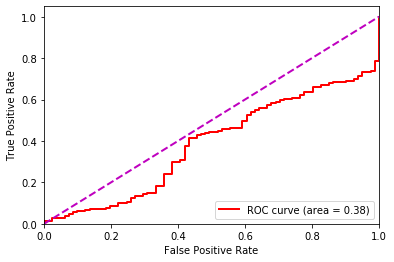

In [0]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# False Positive Rate、True Positive Rate
fpr, tpr, threshold = roc_curve(Y_list, score_list)

roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='m', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Other method to compute anomaly score

In [0]:
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2

# 3. Load the two input images
for elem in X_test:
  imageA = elem
  temp = []
  temp.append(imageA)
  gen_noise = e.predict(np.array(temp))
  gen_img = g.predict(gen_noise)
  imageB = gen_img[0]

  # 4. Convert the images to grayscale
  grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

  # 5. Compute the Structural Similarity Index (SSIM) between the two
  #    images, ensuring that the difference image is returned
  (score, diff) = compare_ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")

  plt.imshow(diff)
  plt.show()

  # 6. You can print only the score if you want
  print("SSIM: {}".format(score))

  score_list.append(score)
  Y_list.append(1)

In [0]:
import numpy
from scipy import signal
from scipy import ndimage

def gaussian2(size, sigma):
  """Returns a normalized circularly symmetric 2D gauss kernel array

  f(x,y) = A.e^{-(x^2/2*sigma^2 + y^2/2*sigma^2)} where

  A = 1/(2*pi*sigma^2)

  as define by Wolfram Mathworld 
  http://mathworld.wolfram.com/GaussianFunction.html
  """
  A = 1/(2.0*numpy.pi*sigma**2)
  x, y = numpy.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
  g = A*numpy.exp(-((x**2/(2.0*sigma**2))+(y**2/(2.0*sigma**2))))
  return g

def fspecial_gauss(size, sigma):
  """Function to mimic the 'fspecial' gaussian MATLAB function
  """
  x, y = numpy.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
  g = numpy.exp(-((x**2 + y**2)/(2.0*sigma**2)))
  return g/g.sum()

def msssim(img1, img2):
  """This function implements Multi-Scale Structural Similarity (MSSSIM) Image 
  Quality Assessment according to Z. Wang's "Multi-scale structural similarity 
  for image quality assessment" Invited Paper, IEEE Asilomar Conference on 
  Signals, Systems and Computers, Nov. 2003 
  
  Author's MATLAB implementation:-
  http://www.cns.nyu.edu/~lcv/ssim/msssim.zip
  """
  level = 5
  weight = numpy.array([0.0448, 0.2856, 0.3001, 0.2363, 0.1333])
  downsample_filter = numpy.ones((2, 2))/4.0
  im1 = img1.astype(numpy.float64)
  im2 = img2.astype(numpy.float64)
  mssim = numpy.array([])
  mcs = numpy.array([])
  for l in range(level):
      ssim_map, cs_map = ssim(im1, im2, cs_map=True)
      mssim = numpy.append(mssim, ssim_map.mean())
      mcs = numpy.append(mcs, cs_map.mean())
      filtered_im1 = ndimage.filters.convolve(im1, downsample_filter, 
                                              mode='reflect')
      filtered_im2 = ndimage.filters.convolve(im2, downsample_filter, 
                                              mode='reflect')
      im1 = filtered_im1[::2, ::2]
      im2 = filtered_im2[::2, ::2]
  return (numpy.prod(mcs[0:level-1]**weight[0:level-1])*
                  (mssim[level-1]**weight[level-1]))

def ssim(img1, img2, cs_map=False):
  print(img1.shape)
  print(img2.shape)
  """Return the Structural Similarity Map corresponding to input images img1 
  and img2 (images are assumed to be uint8)

  This function attempts to mimic precisely the functionality of ssim.m a 
  MATLAB provided by the author's of SSIM
  https://ece.uwaterloo.ca/~z70wang/research/ssim/ssim_index.m
  """
  img1 = img1.astype(numpy.float64)
  img2 = img2.astype(numpy.float64)
  size = 11
  sigma = 1.5
  window = fspecial_gauss(size, sigma)
  K1 = 0.01
  K2 = 0.03
  L = 255 #bitdepth of image
  C1 = (K1*L)**2
  C2 = (K2*L)**2
  print(window.shape)
  mu1 = signal.fftconvolve(window, img1, mode='valid')
  mu2 = signal.fftconvolve(window, img2, mode='valid')
  mu1_sq = mu1*mu1
  mu2_sq = mu2*mu2
  mu1_mu2 = mu1*mu2
  sigma1_sq = signal.fftconvolve(window, img1*img1, mode='valid') - mu1_sq
  sigma2_sq = signal.fftconvolve(window, img2*img2, mode='valid') - mu2_sq
  sigma12 = signal.fftconvolve(window, img1*img2, mode='valid') - mu1_mu2
  if cs_map:
      return (((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*
                  (sigma1_sq + sigma2_sq + C2)), 
              (2.0*sigma12 + C2)/(sigma1_sq + sigma2_sq + C2))
  else:
      return ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*
                  (sigma1_sq + sigma2_sq + C2))

from PIL import Image


imageA = X_test[6]
temp = []
temp.append(imageA)
gen_noise = e.predict(np.array(temp))
gen_img = g.predict(gen_noise)
imageB = gen_img[0]

imageA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
imageB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

image1 = numpy.array(imageA)
image2 = numpy.array(imageB)

ssim_map = ssim(image1, image2)
ms_ssim = msssim(image1, image2)

import pylab

pylab.figure()
pylab.subplot(131)
pylab.title('Image1')
pylab.imshow(imageA, interpolation='nearest', cmap=pylab.gray())
pylab.subplot(132)
pylab.title('Image2')
pylab.imshow(imageB, interpolation='nearest', cmap=pylab.gray())
pylab.subplot(133)
pylab.title('SSIM Map\n SSIM: %f\n MSSSIM: %f' % (ssim_map.mean(), ms_ssim))
pylab.imshow(ssim_map, interpolation='nearest', cmap=pylab.gray())
pylab.show()

In [0]:
import numpy
from skimage import io
import tensorflow as tf


def log10(x):
    numerator = tf.log(x)
    denominator = tf.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator


def psnr(im1, im2):
    img_arr1 = numpy.array(im1).astype('float32')
    img_arr2 = numpy.array(im2).astype('float32')
    mse = tf.reduce_mean(tf.squared_difference(img_arr1, img_arr2))
    psnr = tf.constant(255**2, dtype=tf.float32)/mse
    result = tf.constant(10, dtype=tf.float32)*log10(psnr)
    with tf.Session():
        result = result.eval()
    return result

imageA = X_test[4]
temp = []
temp.append(imageA)
gen_noise = e.predict(np.array(temp))
gen_img = g.predict(gen_noise)
imageB = gen_img[0]

psnr(imageA, imageB)

In [0]:
python -v